In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score 

#### 1a) Implementar una función que calcule la pendiente y la ordenada al origen de la recta de regresión lineal con las fórmulas vistas en clase

In [19]:
def coefs_rl(x,y):
    x_prom = x.mean()
    y_prom = y.mean()
    y_nuevo = y - y_prom
    x_nuevo = x - x_prom
    beta_1 = (sum(x_nuevo*y_nuevo))/sum((x_nuevo)**2)
    beta_0 = y_prom - beta_1*x_prom
    print(f"El valor de beta_ 1 es :{beta_1}, mientras que el de beta_0 es: {beta_0}")
    return

In [5]:
from gapminder import gapminder

#### b) Con el dataset gapminder, utilizar la función implementada en el item anterior para realizar una regresión lineal entre los años y la expectiva de vida en Argentina. Comparar los coeficientes con los obtenidos por scikit-learn.

In [8]:
datos = gapminder[gapminder["country"] == "Argentina"]

In [9]:
datos.head()

,country,continent,year,lifeExp,pop,gdpPercap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526


In [20]:
coefs_rl(datos["year"], datos["lifeExp"])

El valor de beta_ 1 es :0.2317083916083916, mientras que el de beta_0 es: -389.6063445221445


In [23]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["year"]], datos[["lifeExp"]]) 
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print(beta_1, beta_0)

0.23170839160839155 -389.6063445221444


#### 2) En este ejercicio trabajaremos con el dataset de inmuebles (inmuebles.csv en la página de la materia). El dataset contiene datos sobre inmuebles que están a la venta en cierta ciudad: su superficie en m2, su precio en millones de pesos y la zona de la ciudad donde se encuentra. Recordar como cargar un dataset desde un .csv y visualizar sus primeras filas:

In [25]:
df_inm = pd.read_csv("inmuebles.csv")

In [27]:
df_inm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   superficie  169 non-null    float64
 1   precio      169 non-null    float64
 2   zona        169 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [28]:
df_inm.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


#### a) Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie y el precio de cada imueble.

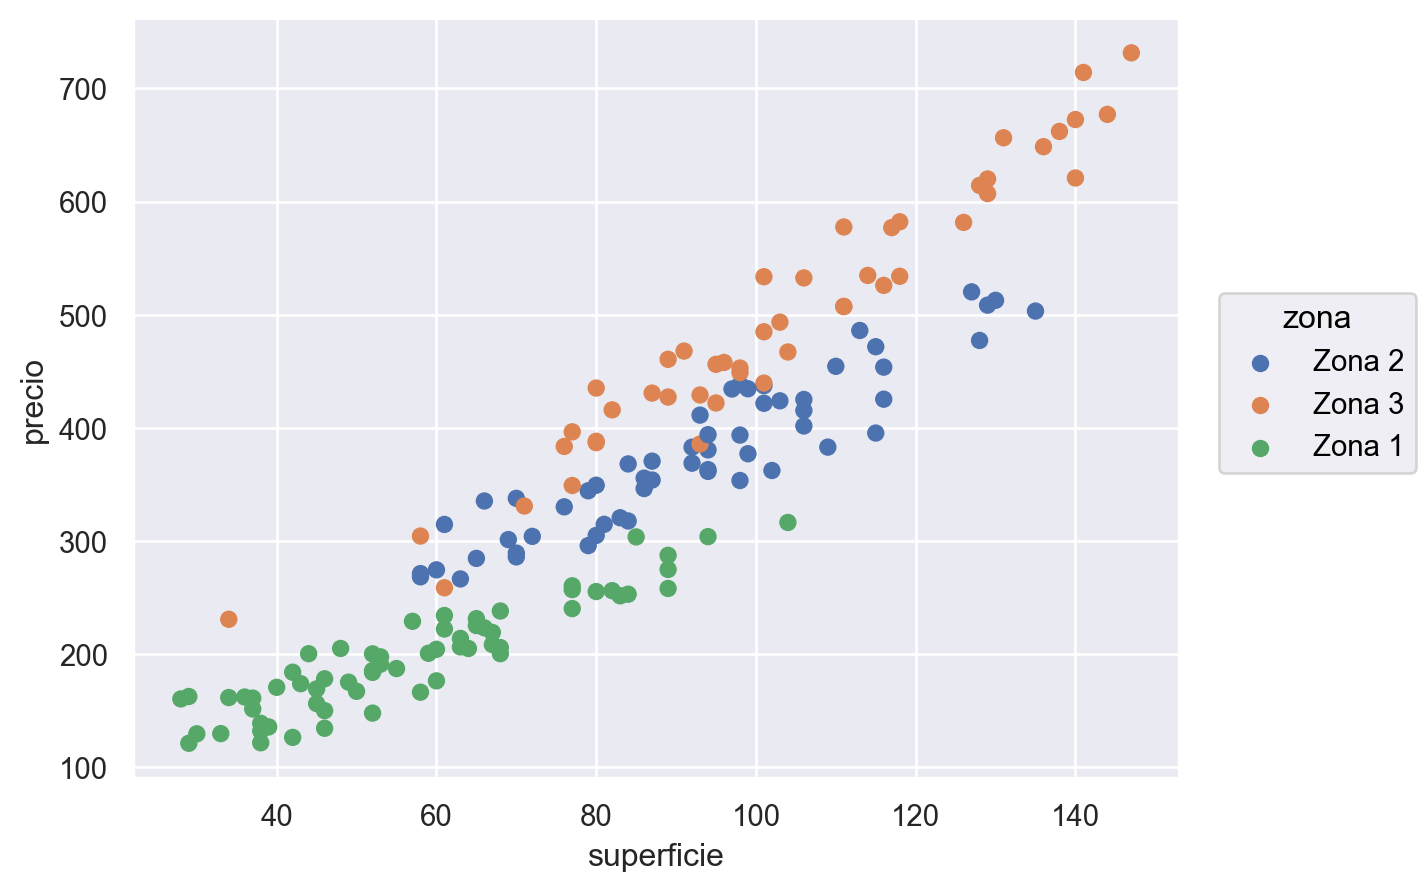

In [30]:
(
    so.Plot(df_inm, "superficie","precio",color = "zona")
    .add(so.Dot())
)

#### b) Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse “Datos inmobiliarios” y la recta de Regresión Lineal debe tener una leyenda que diga “Regresión”.


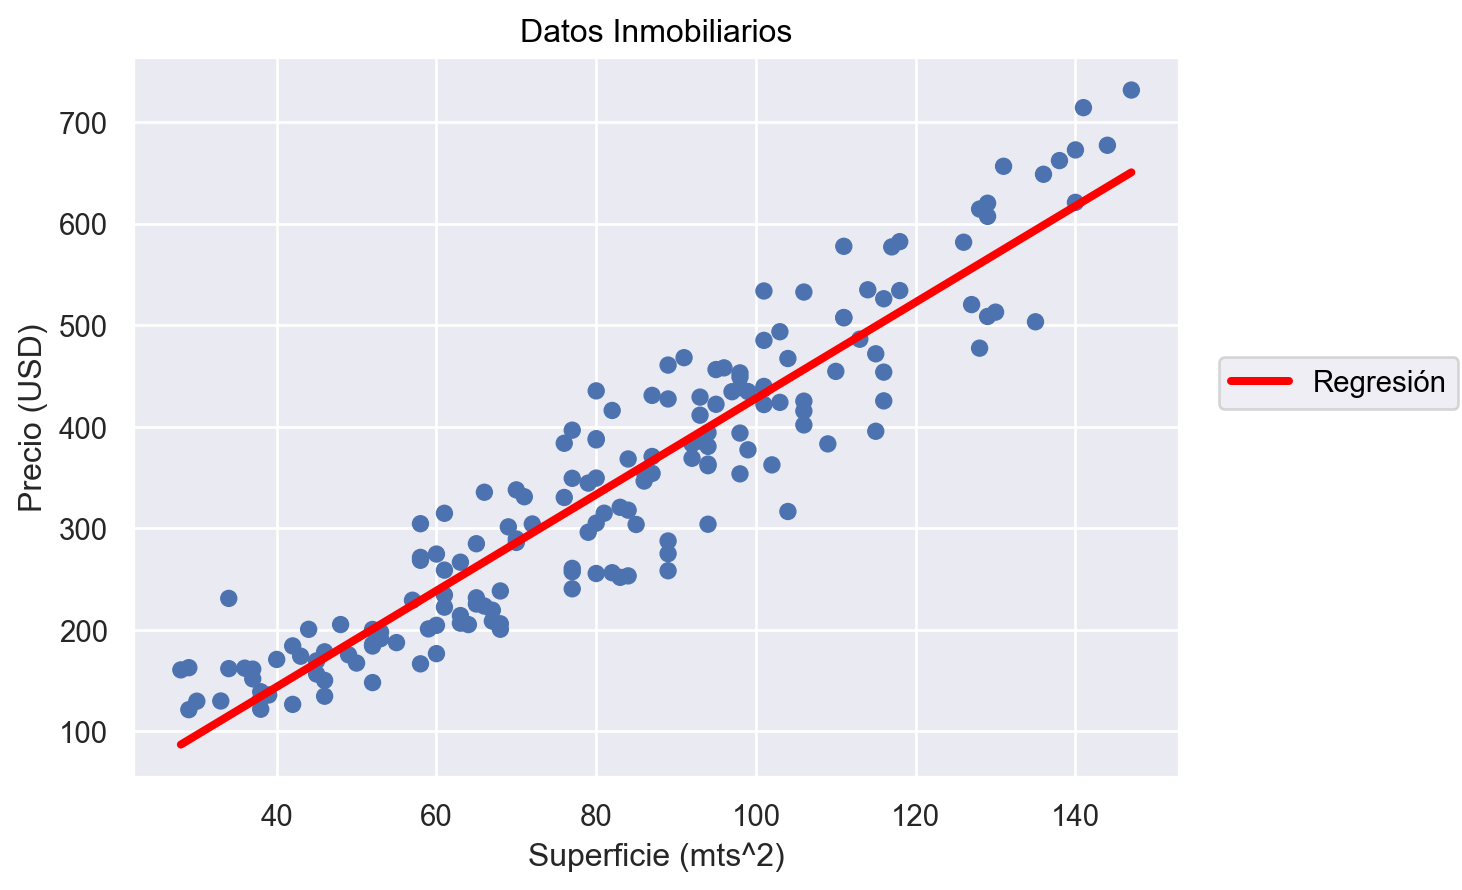

In [44]:
(
    so.Plot(df_inm, "superficie","precio")
    .add(so.Dot())
    .add(so.Line(color = "red", linewidth =3), so.PolyFit(1), label = "Regresión")
).label(title = "Datos Inmobiliarios", x = "Superficie (mts^2)", y = "Precio (USD)")

#### c) c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué podríamos interpretar sobre el costo del metro cuadrado en la ciudad?

In [131]:
modelo = linear_model.LinearRegression()
modelo.fit(df_inm[["superficie"]], df_inm[["precio"]])
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]

print(beta_1, beta_0)


4.73579682230239 -45.73153403092567


Podemos interpretar que por cada mts cuadrado que aumenta, el precio aumenta por 4,7 aprox (sin tener en cuenta el factor de la ordenada al origen)

#### d)Para medir qué tan bien ajusta la recta a los datos, vamos a implementar dos funciones: una que calcule el error cuadrático medio (ECM) y otra que calcule el coeficiente de determinación R2.

In [134]:
def aprox_precioInm(beta1, beta0,superf):
    y_aprox = beta0 + beta1*superf
    return y_aprox
#print(recta_modelado(1))
      

In [57]:
def ecm(x, y, pendiente , o_origen):
    y_somb = x*pendiente + o_origen
    ecm = ((y - y_somb)**2).mean()
    
    return ecm


def r_cuad(x, y, pendiente , o_origen): 
    y_somb = x*pendiente + o_origen
    y_promDatos = y.mean()
    r2 = (np.sum((y_somb - y_promDatos)**2))/(np.sum((y - y_promDatos)**2))
    
    return r2

In [54]:
print(ecm(df_inm["superficie"], df_inm["precio"], beta_1, beta_0))

2630.9300019446955


In [58]:
print(r_cuad(df_inm["superficie"], df_inm["precio"], beta_1, beta_0))

0.8762114698357931


In [60]:
print(np.sqrt(ecm(df_inm["superficie"], df_inm["precio"], beta_1, beta_0)))

51.292592076679995


In [68]:
mean_squared_error(df_inm[['precio']], recta_modelado(df_inm["superficie"]))

2630.9300019446955

In [136]:
r2_score(df_inm[['precio']], aprox_precioInm(beta_1,beta_0,df_inm["superficie"]))

0.8762114698357936

#### e) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad de precios. ¿Hay algún outlier?

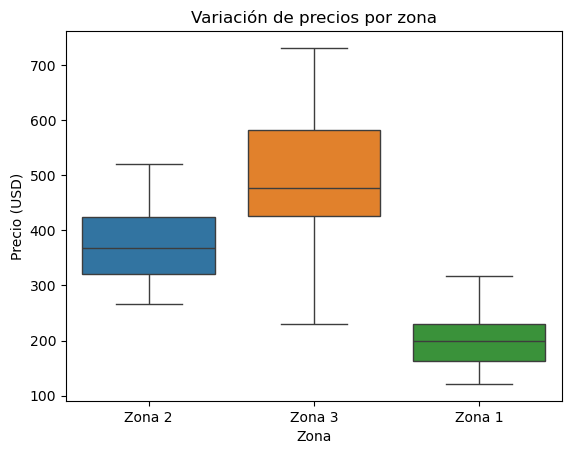

In [78]:
graf = sns.boxplot(x = df_inm["zona"], y = df_inm["precio"], hue = df_inm["zona"])
graf.set(title = "Variación de precios por zona", xlabel = "Zona", ylabel = "Precio (USD)")
plt.show()

#### f) oPara cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta que mejor aproxima a los datos.

In [91]:
zona_1 = df_inm[df_inm["zona"] == "Zona 1"].reset_index(drop = True)
zona_3 = df_inm[df_inm["zona"] == "Zona 3"].reset_index(drop = True)
zona_2 = df_inm[df_inm["zona"] == "Zona 2"].reset_index(drop = True)

#zona_2.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,72.0,304.119940,Zona 2
4,103.0,423.909166,Zona 2


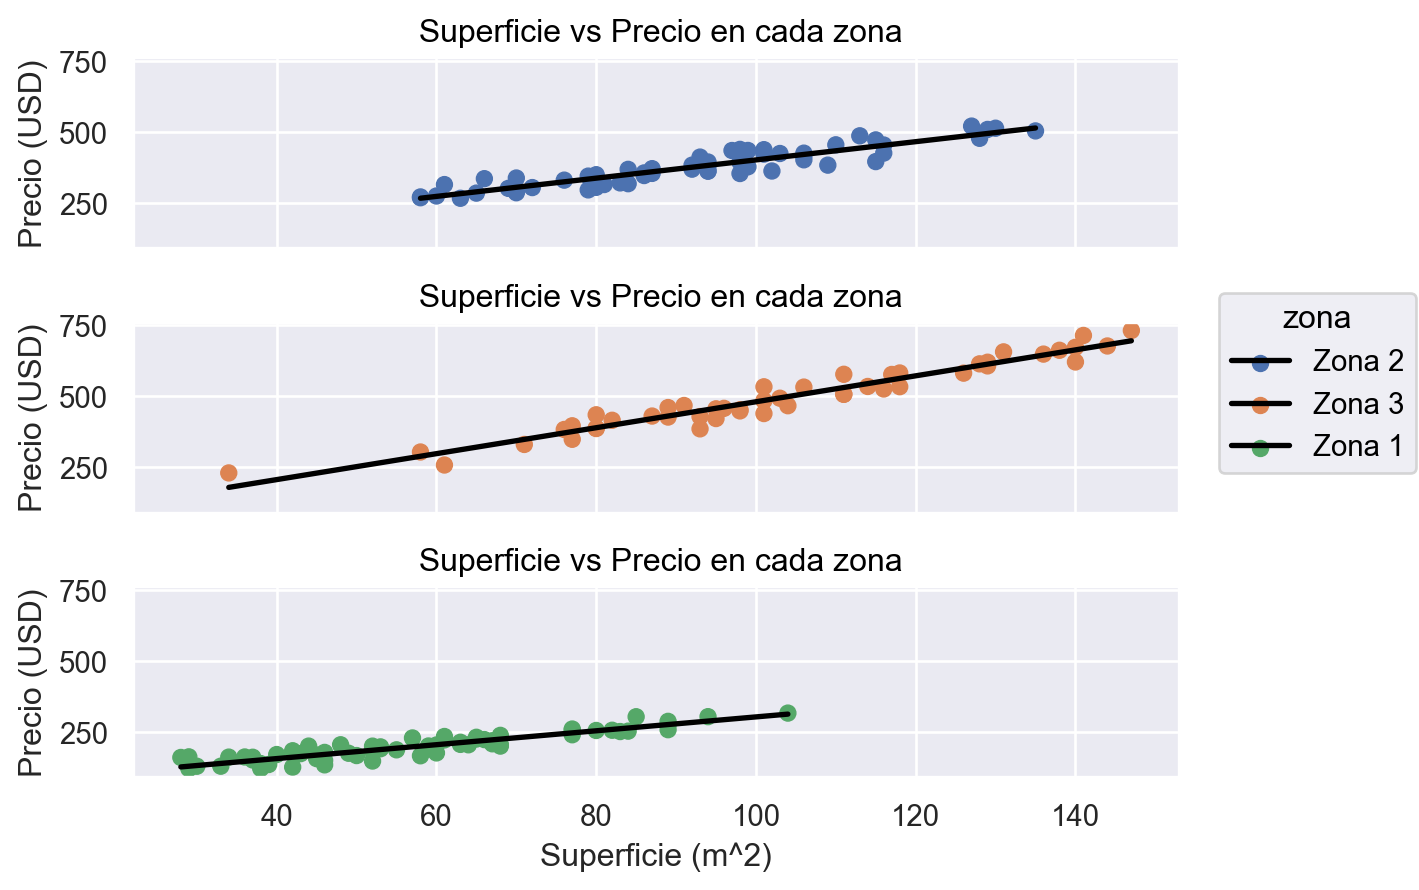

In [117]:
por_zona = (
    so.Plot(df_inm, "superficie", "precio", color = "zona")
    .add(so.Dot())
    .add(so.Line(color = "black", linewidth = 2), so.PolyFit(1))
).label(title = " Superficie vs Precio en cada zona",x="Superficie (m^2)",y="Precio (USD)")

por_zona.facet("zona", wrap = 1)

In [130]:
modelo1 = linear_model.LinearRegression()
modelo1.fit(zona_1[["superficie"]], zona_1[["precio"]])
beta_1_z1 = modelo.coef_[0][0]
beta_0_z1 = modelo.intercept_[0]

print(f"Los coeficientes de la recta para la Zona 1 son: Beta 1 = {beta_1_z1},beta 0 = {beta_0_z1}")



Los coeficientes de la recta para la Zona 1 son: Beta 1 = 4.560544269538954,beta 0 = 24.966485225784936
Los coeficientes de la recta para la Zona 2 son: Beta 1 = 4.560544269538954,beta 0 = 24.966485225784936
Los coeficientes de la recta para la Zona 3 son: Beta 1 = 4.560544269538954,beta 0 = 24.966485225784936


In [152]:

modelo2 = linear_model.LinearRegression()
modelo2.fit(zona_2[["superficie"]], zona_2[["precio"]])
beta_1_z2 = modelo.coef_[0][0]
beta_0_z2 = modelo.intercept_[0]

print(f"Los coeficientes de la recta para la Zona 2 son: Beta 1 = {beta_1_z2},beta 0 = {beta_0_z2}")


Los coeficientes de la recta para la Zona 2 son: Beta 1 = 4.73579682230239,beta 0 = -45.73153403092567


In [153]:
modelo3 = linear_model.LinearRegression()
modelo3.fit(zona_3[["superficie"]], zona_3[["precio"]])
beta_1_z3 = modelo.coef_[0][0]
beta_0_z3 = modelo.intercept_[0]

print(f"Los coeficientes de la recta para la Zona 3 son: Beta 1 = {beta_1_z3},beta 0 = {beta_0_z3}")

Los coeficientes de la recta para la Zona 3 son: Beta 1 = 4.73579682230239,beta 0 = -45.73153403092567


In [126]:
ecm_zona1 = mean_squared_error(zona_1[["precio"]], beta_1_z1*zona_1[["superficie"]]+ beta_0_z1)

r2_zon1 = r2_score(zona_1[["precio"]], beta_1_z1*zona_1[["superficie"]]+ beta_0_z1)


print(f"El error cuadático medio de la recta para la zona 1 es: {ecm_zona1}, mientras que su R^2 es de {r2_zon1}")

El error cuadático medio de la recta para la zona 1 es: 331.22746770470974, mientras que su R^2 es de 0.855923919218176


In [127]:
ecm_zona2 = mean_squared_error(zona_2[["precio"]], beta_1_z2*zona_2[["superficie"]]+ beta_0_z2)

r2_zon2 = r2_score(zona_2[["precio"]], beta_1_z2*zona_2[["superficie"]]+ beta_0_z2)


print(f"El error cuadático medio de la recta para la zona 2 es: {ecm_zona2}, mientras que su R^2 es de {r2_zon2}")

El error cuadático medio de la recta para la zona 2 es: 611.4955812522104, mientras que su R^2 es de 0.866027281146202


In [128]:
ecm_zona3 = mean_squared_error(zona_3[["precio"]], beta_1_z3*zona_3[["superficie"]]+ beta_0_z3)

r2_zon3 = r2_score(zona_3[["precio"]], beta_1_z3*zona_3[["superficie"]]+ beta_0_z3)


print(f"El error cuadático medio de la recta para la zona 3 es: {ecm_zona3}, mientras que su R^2 es de {r2_zon3}")

El error cuadático medio de la recta para la zona 3 es: 748.8800907160429, mientras que su R^2 es de 0.9445652745220188


#### g) Supongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo el valor calculado anteriormente?

In [139]:
print(f" Si no sabemos que está en la Zona 2 el precio sería: {aprox_precioInm(beta_1,beta_1,105)} mientras que si lo sabemos tendría un precio de referencia de {aprox_precioInm(beta_1_z2,beta_0_z2,105)}")

 Si no sabemos que está en la Zona 2 el precio sería: 501.9944631640534 mientras que si lo sabemos tendría un precio de referencia de 503.8236335273751


#### h) Si me ofrecen un inmueble de 100 m2 en la Zona 2 a un precio de 300, ¿qué tan barato o caro es respecto a su precio de referencia?

In [141]:
aprox_precioInm(beta_1_z2, beta_0_z2, 100).round()

481.0

In [144]:
print(f" El precio de referencia es {aprox_precioInm(beta_1_z2, beta_0_z2, 100).round()}, por lo tanto, te están queriendo robar a mano armada")

 El precio de referencia es 481.0, por lo tanto, te están queriendo robar a mano armada


#### i) Efecto de los outliers. En este item trabajaremos con los datos de inmuebles_outliers.csv, que tiene los mismos datos que inmuebles.csv, salvo cuatro que son outliers.i. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outliers. ii. Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos en el ítem h)

In [146]:
df_inmOut = pd.read_csv("inmuebles_outliers.csv")
df_inmOut.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


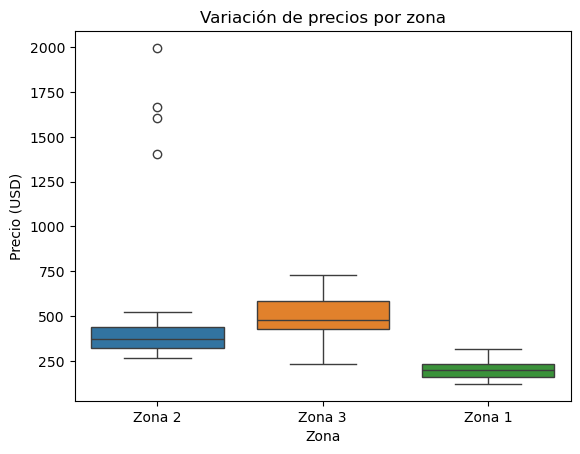

In [148]:
graf1 = sns.boxplot(x = df_inmOut["zona"], y = df_inmOut["precio"], hue = df_inmOut["zona"])
graf1.set(title = "Variación de precios por zona", xlabel = "Zona", ylabel = "Precio (USD)")
plt.show()

In [156]:
zona2_out = df_inmOut[df_inmOut["zona"] == "Zona 2"].reset_index()
zona2_out.head()

,index,superficie,precio,zona
0,0,110.0,454.425690,Zona 2
1,1,109.0,383.004114,Zona 2
2,2,101.0,437.362638,Zona 2
3,8,72.0,304.119940,Zona 2
4,10,103.0,423.909166,Zona 2


In [157]:
modelo_ConOutliers = linear_model.LinearRegression()
modelo_ConOutliers.fit(zona2_out[["superficie"]],zona2_out[["precio"]])
beta_1_out = modelo_ConOutliers.coef_[0][0]
beta_0_out = modelo_ConOutliers.intercept_[0]
print(beta_1_out, beta_0_out)
print(beta_1_z2,beta_0_z2)

4.266539806966732 72.89381076100466
4.73579682230239 -45.73153403092567


In [160]:
r2_score(zona2_out[["precio"]], aprox_precioInm(beta_1_out,beta_0_out,zona2_out[["superficie"]]))

0.059940627284871595

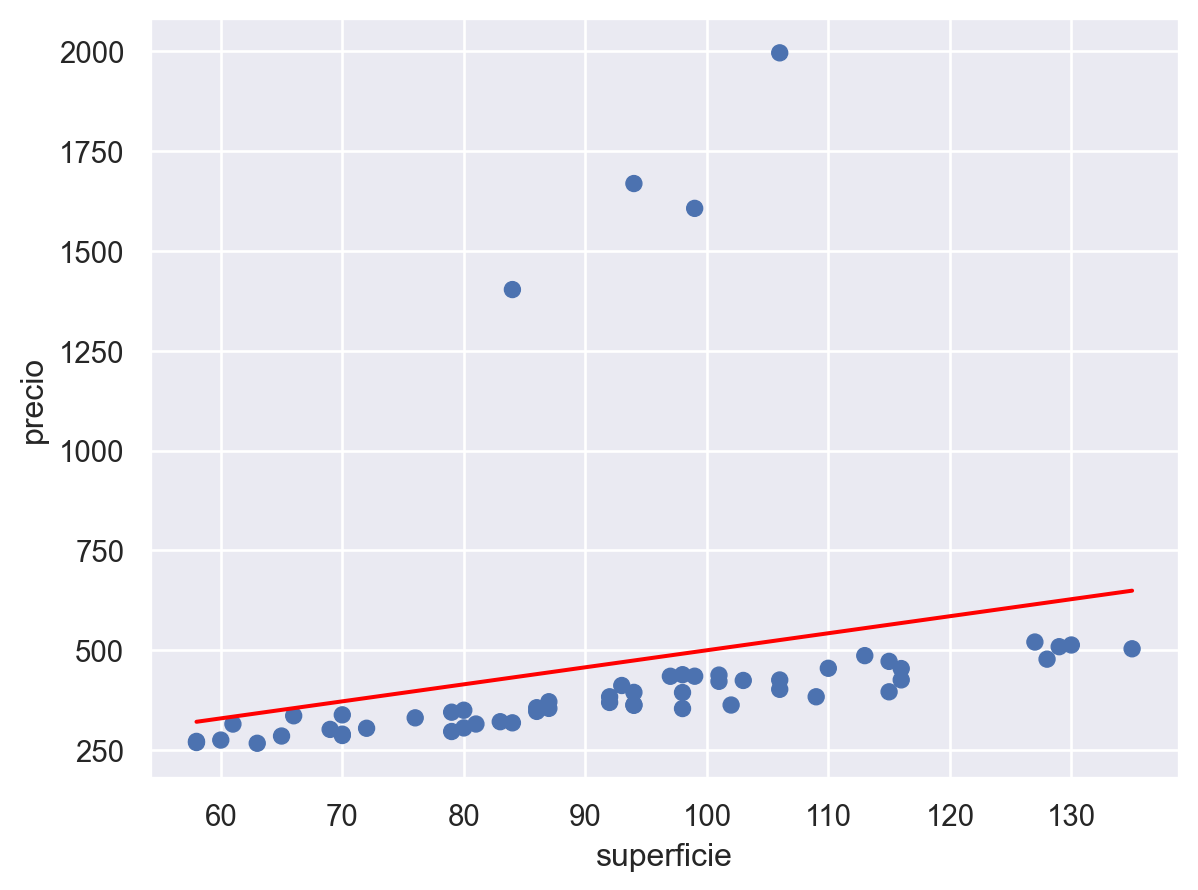

In [166]:
(
    so.Plot(zona2_out, "superficie","precio")
    .add(so.Dot())
    .add(so.Line(color = "red"), so.PolyFit(1))
)

#### Ejercicio 3

#### Nos interesa analizar la evolución del precio de cierre (Close) en periodo comprendido entre el 01/01/2021 y el 01/07/2021:

In [169]:
btc = pd.read_csv("bitcoin.csv")
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [170]:
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

In [174]:
btc_2021 = btc[(btc["Date"] > "1/1/2021") & (btc["Date"] < "2/7/2021")]
btc_2021.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811


#### Visualizar el ajuste lineal para los datos del dataframe btc_2021. En este caso, ¿resulta más conveniente un scatterplot o un gráfico de lineas para los datos? ¿Te resultaría útil utilizar esta recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?

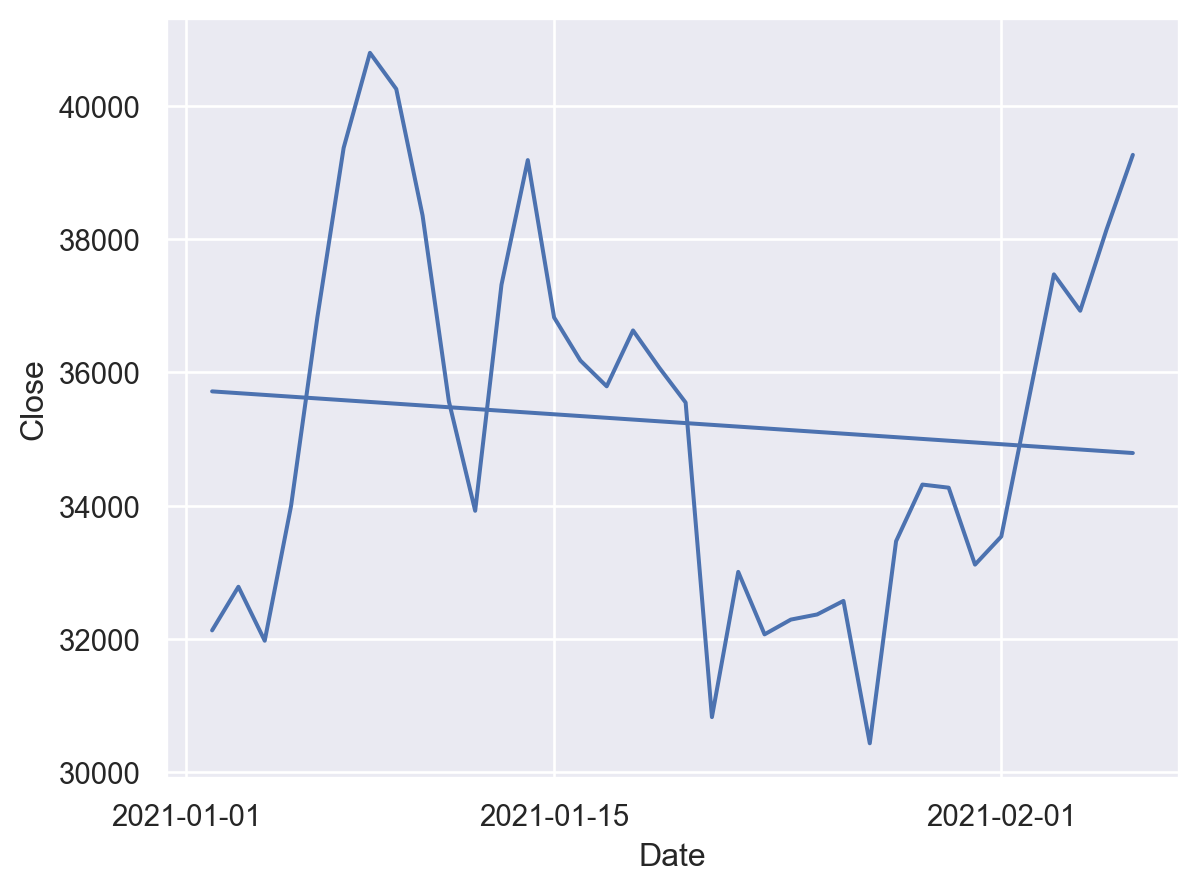

In [184]:
(
    so.Plot(btc_2021, "Date", "Close")
    .add(so.Line())
    .add(so.Line(),so.PolyFit(1))
)

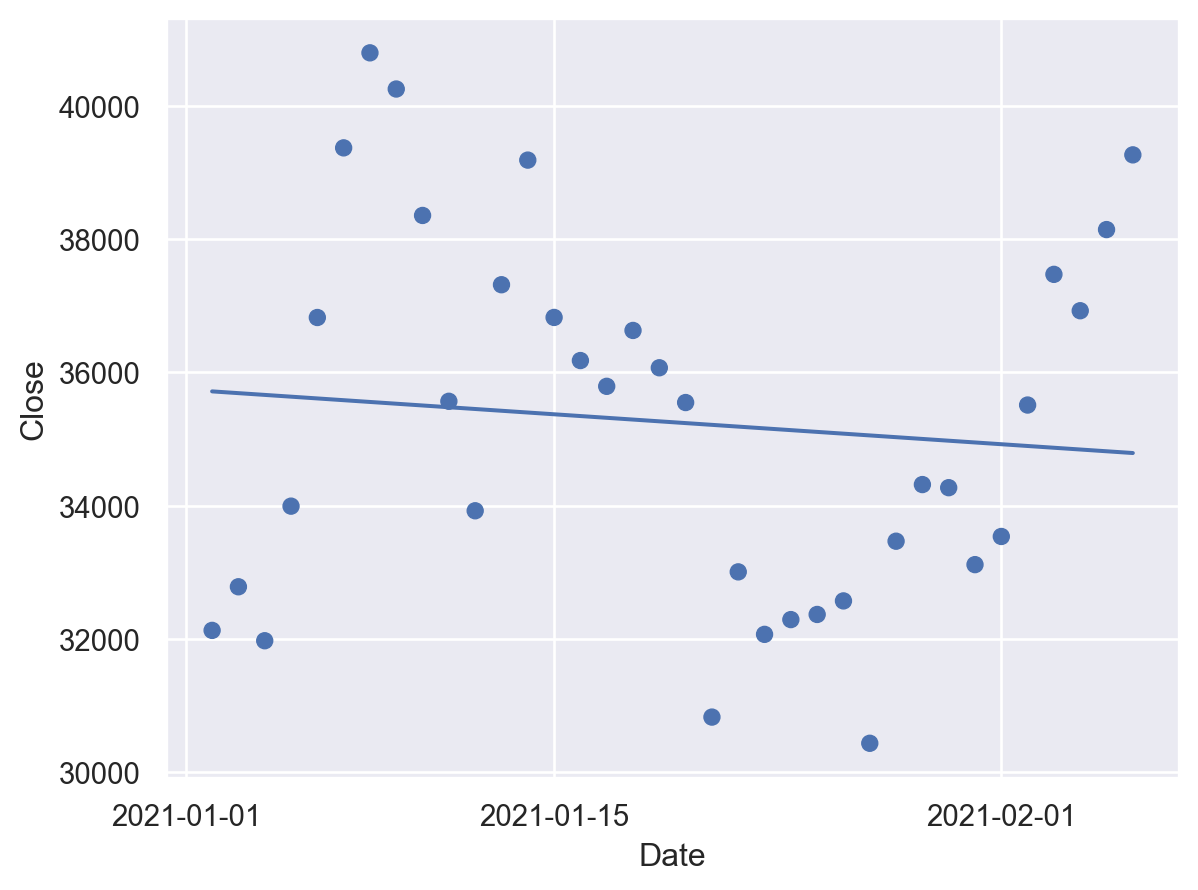

In [187]:
(
    so.Plot(btc_2021, "Date", "Close")
    .add(so.Dot())
    .add(so.Line(),so.PolyFit(1))
)

Parece ser más claro el gráfico de línea para ver el comportamiento, que a su vez no está bien aproximado por la regresión lineal. Voy a probar agregandole más grados a polyfit

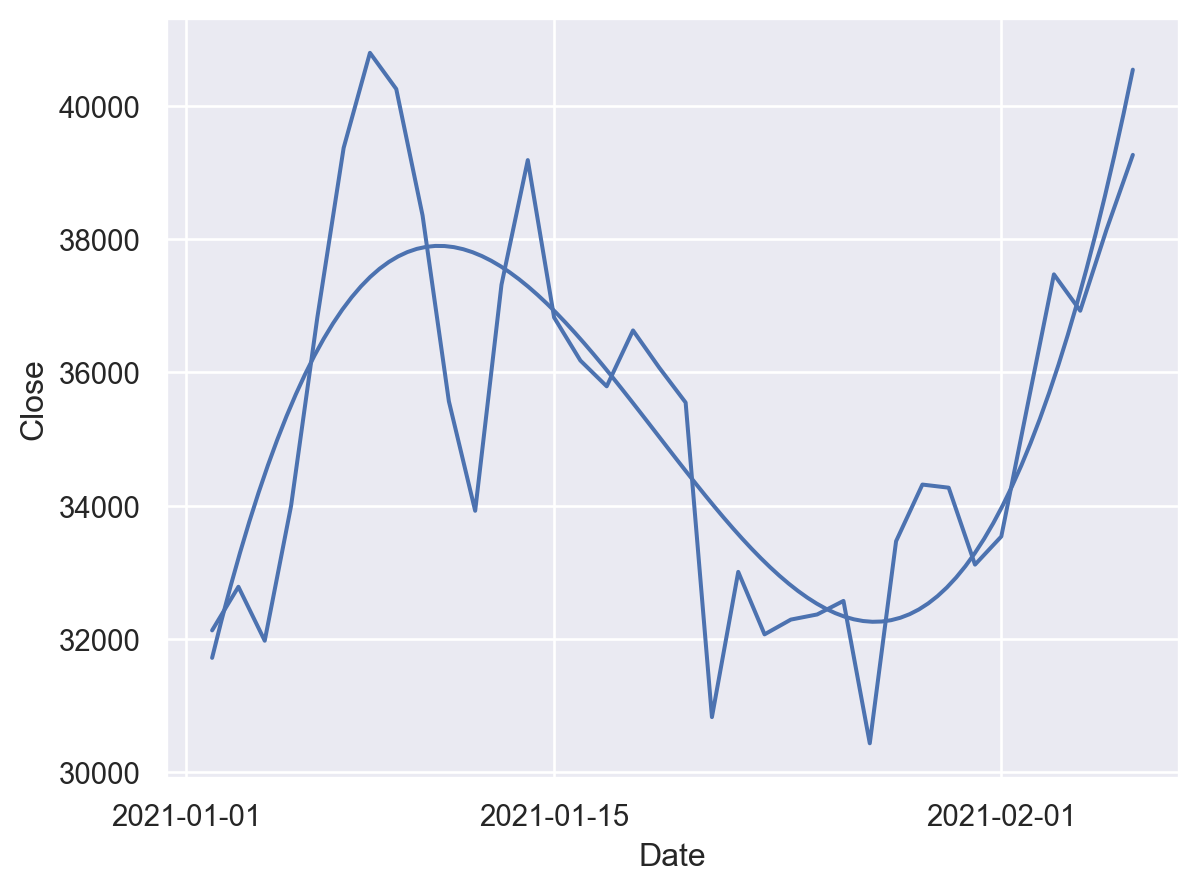

In [192]:
(
    so.Plot(btc_2021, "Date", "Close")
    .add(so.Line())
    .add(so.Line(),so.PolyFit(3))
)

Con un polinomio de grado 3 parece acerecarse un poco más, aunque le primer parte difiere bastante de los datos

Calculo el R^2 de la regresión lineal hecha anteriormente.

In [195]:
btc_model = linear_model.LinearRegression()
btc_model.fit(btc_2021[["Date"]], btc_2021[["Close"]])
beta_1btc = btc_model.coef_[0][0]
beta_0_btc = btc_model.intercept_[0]
print(beta_1btc,beta_0_btc)

-3.060328278784734e-13 528289.0948004398


In [201]:
fechas = pd.to_numeric(btc_2021["Date"])

r2_score(btc_2021["Close"], aprox_precioInm(beta_1btc,beta_0_btc,fechas))

0.010131967678522646

In [211]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### realizar la Regresión Lineal donde la variable X es total_bill menos el promedio de total_bill y la variable Y es tip. Responder las siguientes preguntas:

In [216]:
prom_bill = tips["total_bill"].mean()
x_bill = tips["total_bill"] - prom_bill
display(x_bill)

0     -2.795943
1     -9.445943
2      1.224057
3      3.894057
4      4.804057
         ...   
239    9.244057
240    7.394057
241    2.884057
242   -1.965943
243   -1.005943
Name: total_bill, Length: 244, dtype: float64

In [232]:
df_bill = pd.DataFrame(x_bill)
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


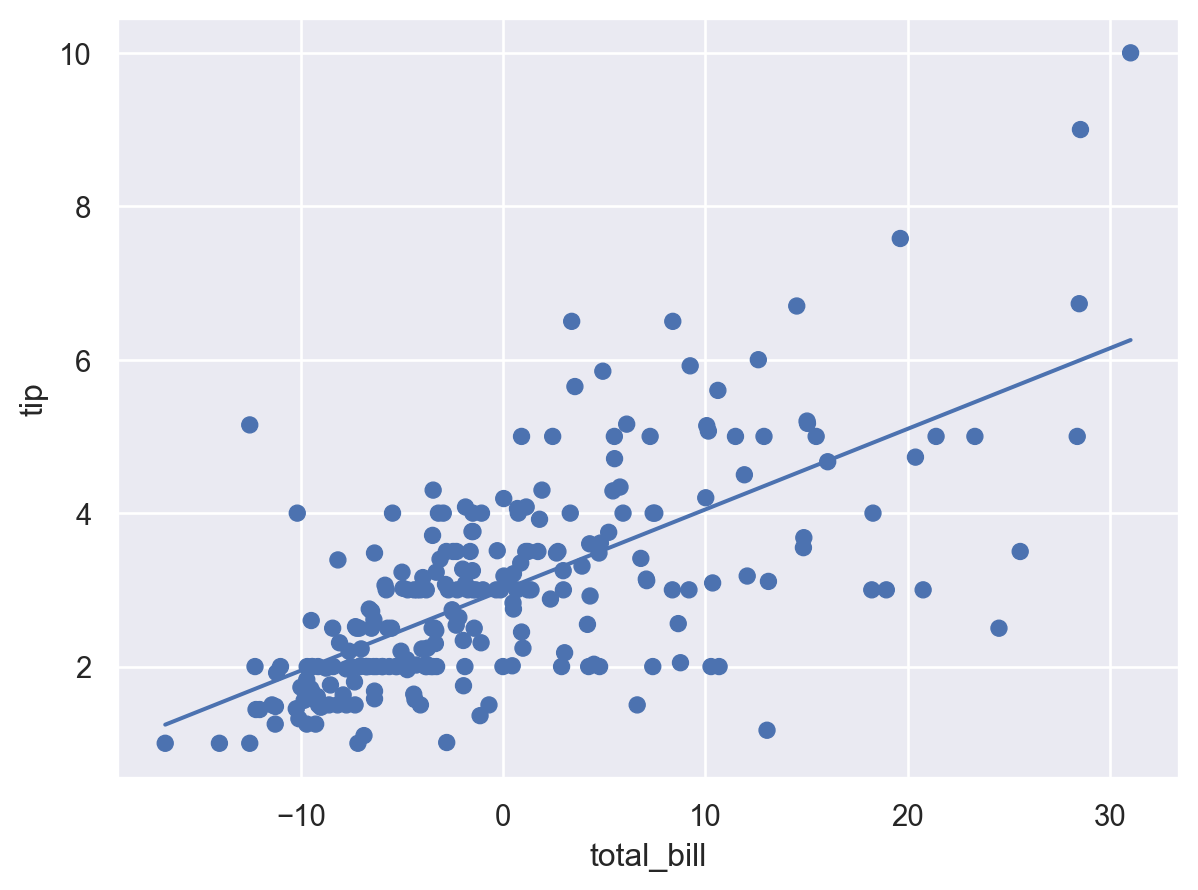

In [221]:
(
    so.Plot(x = x_bill, y = tips["tip"])
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(1))
)

In [233]:
modelo_tips = linear_model.LinearRegression()
modelo_tips.fit(df_bill, tips[["tip"]])
beta_1_tips = modelo_tips.coef_[0][0]
beta_0_tips = modelo_tips.intercept_[0]

print(f"El beta 1 para los datos de propinas es: {beta_1_tips} mientras que el beta 0 es: {beta_0_tips}")

El beta 1 para los datos de propinas es: 0.10502451738435337 mientras que el beta 0 es: 2.99827868852459


#### (a) ¿Qué interpretación se le puede dar a β0? Pista: calcular el promedio de las propinas. (b) ¿Cambia el valor de β1 respecto a la Regresión Lineal de total_bill vs. tip?

In [235]:
prom_tips = tips["tip"].mean()
display(prom_tips

2.99827868852459

Parece ser el promedio, tal vez el nivel de propina que se deja independientemente de la cantidad consumida? También parece influir que la mayor cantidad de bills está en la zona en que la propina fue de 3 dolares aprox

In [236]:
modelo_tips2 = linear_model.LinearRegression()
modelo_tips2.fit(tips[["total_bill"]], tips[["tip"]])
beta_1_tips2 = modelo_tips.coef_[0][0]
beta_0_tips2 = modelo_tips.intercept_[0]

print(f"El beta 1 para los datos de propinas es: {beta_1_tips2} mientras que el beta 0 es: {beta_0_tips2}")

El beta 1 para los datos de propinas es: 0.10502451738435337 mientras que el beta 0 es: 2.99827868852459


No cambió el valor de beta 1 porque la recta es igual, la relación de cada punto en el x con las propinas es la misma, por lo tanto los coeficientes no cambian. al hacer la resta solo desplacé toda la distribución más a la izquierda respecto del eje y#.

#### En este ejercicio utilizaremos el dataset healthexp de seaborn, donde se recopila cada año (Year) lo que cada país (Country) invierte en salud por habitante (Spending_USD) y su expectativa de vida (Life_Expectancy). Nos enfocaremos en los datos de Japón, nuestra variable predictora será Spending_USD y la dependiente será Life_Expectancy.

In [237]:
lifeExp = sns.load_dataset("healthexp")
lifeExp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [240]:
japon = lifeExp[lifeExp["Country"] == "Japan"].reset_index()
japon.head()

,index,Year,Country,Spending_USD,Life_Expectancy
0,3,1970,Japan,150.437,72.0
1,8,1971,Japan,163.854,72.9
2,11,1972,Japan,185.390,73.2
3,14,1973,Japan,205.778,73.4
4,17,1974,Japan,242.018,73.7


#### a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado 3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del gráfico.

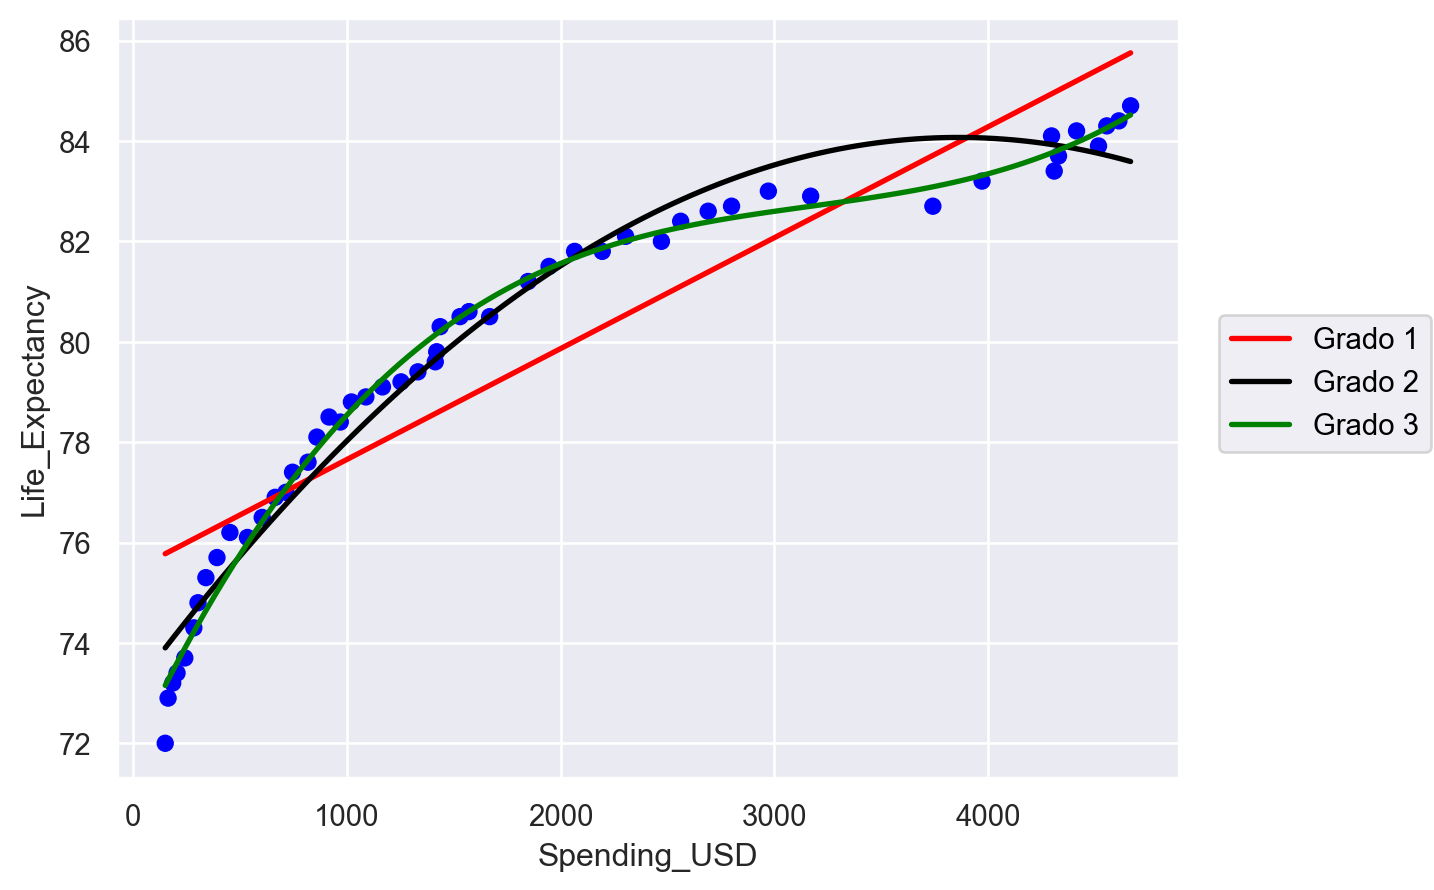

In [248]:
(
    so.Plot(japon, "Spending_USD", "Life_Expectancy")
    .add(so.Dot(color = "blue"))
    .add(so.Line(color = "red", linewidth = 2), so.PolyFit(1), label = "Grado 1")
    .add(so.Line(color = "black", linewidth = 2), so.PolyFit(2), label = "Grado 2")
    .add(so.Line(color = "green", linewidth = 2), so.PolyFit(3), label = "Grado 3")
)

#### b) En base al gráfico obtenido en el ítem anterior, elegir el grado que considerás que mejor ajusta a los datos. Utilizando scikit-learn, calcular los coeficientes de ese polinomio.


In [251]:
from sklearn.preprocessing import PolynomialFeatures 

polynomial_features = PolynomialFeatures(degree=3, include_bias=False)  

# Armamos una matriz cuya primera columna es x, la segunda es x^2 y la tercera es x^3

x_poly = polynomial_features.fit_transform(japon[['Spending_USD']])   

#display(x_poly)

In [256]:
LE_model = linear_model.LinearRegression()
LE_model.fit(x_poly,japon["Life_Expectancy"])

betas = LE_model.coef_
beta_0LE = LE_model.intercept_.item()


print('beta_0: ', beta_0LE)
print('beta_1: ', betas[0])
print('beta_2: ', betas[1])
print('beta_3: ', betas[2])

beta_0:  71.84403247811414
beta_1:  0.009097662220279312
beta_2:  -2.6841733213765864e-06
beta_3:  2.8216848452775663e-10


#### c) Calcular el R2 y el ECM.

In [269]:
def pol_3grado(x):
    y_ = beta_0LE + x*betas[0] + betas[1]*x**2 + betas[2]*x**3
    #\rta = pd.DataFrame(y_)
    return y_

In [262]:
r2_LE = r2_score(japon[["Life_Expectancy"]], pol_3grado(japon["Spending_USD"]))
print(f" El R^2 es de: {r2_LE}")

 El R^2 es de: 0.9912790933475436


In [264]:
ecm_LE = mean_squared_error(japon[["Life_Expectancy"]], pol_3grado(japon["Spending_USD"]))
print(f" El ECM es de: {ecm_LE}")

 El ECM es de: 0.10758286138707283


#### d) Según el polinomio obtenido en el ítem anterior, estimar cuál sería la expectativa de vida de los habitantes de Japón si el país invirtiera U$D 5000.

In [270]:
print(f" Estimativamente, la expectativa de vida si se invirtieran U$S 5000 per cápita sería de: {pol_3grado(5000)}")

 Estimativamente, la expectativa de vida si se invirtieran U$S 5000 per cápita sería de: 85.49907111106562
